In [1]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")

In [2]:
#import Files

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

# Filling Scheme 

In [3]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_stub_counts_LS133 = np.bincount(stubs_awk_LS133.bx, weights=stubs_awk_LS133.nStubs)
bx_stub_counts_LS263 = np.bincount(stubs_awk_LS263.bx, weights=stubs_awk_LS263.nStubs)
bx_stub_counts_LS264 = np.bincount(stubs_awk_LS264.bx, weights=stubs_awk_LS264.nStubs)
bx_stub_counts_LS306 = np.bincount(stubs_awk_LS306.bx, weights=stubs_awk_LS306.nStubs)

bx_stub_counts = ak.Array([bx_stub_counts_LS133, bx_stub_counts_LS263, bx_stub_counts_LS264, bx_stub_counts_LS306])

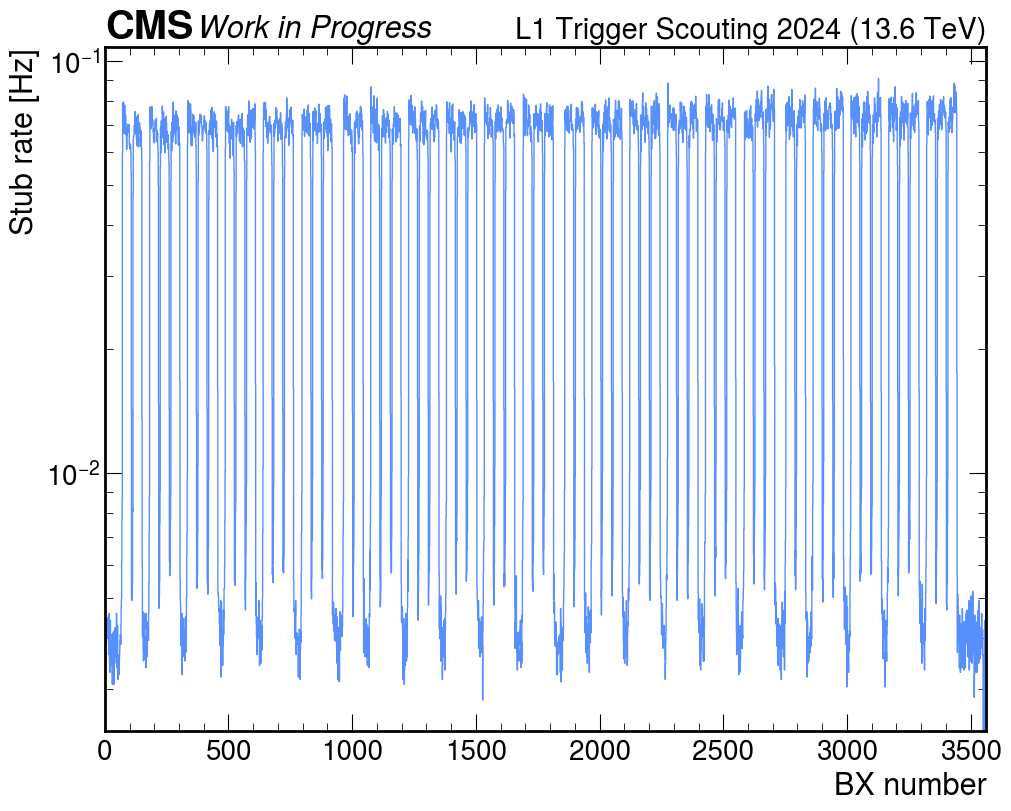

In [8]:
FileNumber = 0

fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_stub_counts[FileNumber]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')
